Data Visualization and Pre-processing

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading dataset

In [ ]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

Visualization

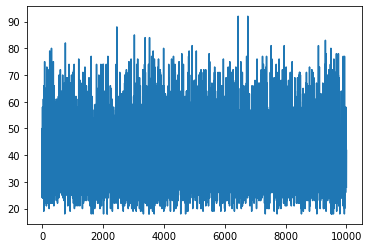

In [ ]:
#univarient analysis
df.Age.plot()

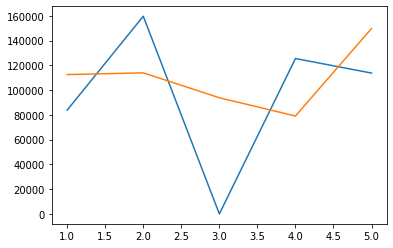

In [ ]:
#bivarient analysis
df.Balance[1:6].plot()
df.EstimatedSalary[1:6].plot()

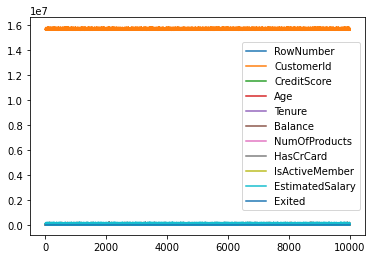

In [ ]:
#multivarient analysis
df.plot()

Descriptive Statistics

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handling missing values

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Outliers

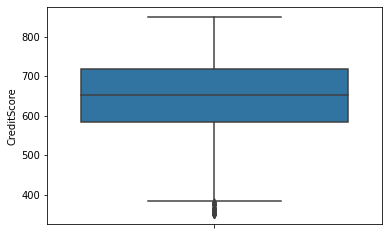

In [ ]:
sns.boxplot(y=df['CreditScore'])

In [ ]:
def findout(df,variable,distance):
  IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
  lower_limit=df[variable].quantile(0.25)-(IQR*distance)
  upper_limit=df[variable].quantile(0.75)+(IQR*distance)
  return upper_limit,lower_limit

In [ ]:
upper_limit,lower_limit=findout(df,'CreditScore',1.5)

In [ ]:
upper_limit,lower_limit

(919.0, 383.0)

In [ ]:
outliers=np.where(df['CreditScore']>upper_limit,True, np.where(df['CreditScore']<lower_limit,True,False))

In [ ]:
outlier = np.where(df['CreditScore']>upper_limit,True,np.where(df['CreditScore']<lower_limit,True,False))

In [ ]:
outliers

array([False, False, False, ..., False, False, False])

In [ ]:
outliers_df=df.loc[outliers,'CreditScore']

In [ ]:
outliers_df.head()

7       376
942     376
1193    363
1405    359
1631    350
Name: CreditScore, dtype: int64

In [ ]:
df_new=df.loc[~outliers,'CreditScore']

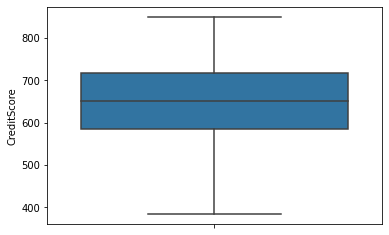

In [ ]:
sns.boxplot(y=df_new)

Categorical column encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label=LabelEncoder()

In [ ]:
df['Gender']=label.fit_transform(df['Gender'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


Dependent and Independent variables

In [ ]:
x=df.drop(columns=['EstimatedSalary'],axis=1)
y=df['EstimatedSalary']
df.head()


,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

Training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=2)

In [ ]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
8856,8857,15759733,McMillan,774,France,Female,26,5,0.00,2,1,1,0
1545,1546,15673908,Chinweike,602,Germany,Female,42,6,158414.85,1,1,1,0
8136,8137,15757425,Fleming,716,France,Female,38,1,0.00,2,1,1,0
7768,7769,15726695,Hsia,601,Spain,Female,20,9,122446.61,2,1,0,0
7782,7783,15595991,Hsiung,585,France,Male,54,8,87105.32,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1100,15673055,Sung,494,Spain,Male,38,7,0.00,2,1,1,0
2514,2515,15598175,Toscani,592,Germany,Female,26,4,105082.07,2,1,0,0
6637,6638,15668767,Kenenna,850,France,Male,36,3,0.00,2,1,0,0
2575,2576,15592736,Lucchese,551,Germany,Male,54,5,102994.04,1,1,0,1


In [ ]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
7878,7879,15760456,Eberechukwu,731,France,Female,38,10,123711.73,2,1,0,1
3224,3225,15713463,Tate,645,Germany,Female,41,2,138881.04,1,1,0,1
1919,1920,15739858,Otitodilichukwu,618,France,Male,56,7,0.00,1,1,1,1
4432,4433,15751193,Nnaemeka,621,Spain,Male,33,4,0.00,2,1,1,0
4835,4836,15590623,Kovalyov,561,Spain,Male,34,4,85141.79,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,9074,15611058,Eluemuno,702,Germany,Female,60,5,138597.54,2,1,1,1
8584,8585,15732967,Cremonesi,731,France,Male,19,6,0.00,2,1,1,0
5390,5391,15573851,Macrossan,735,France,Female,38,1,0.00,3,0,0,1
5092,5093,15596303,White,688,France,Female,39,0,0.00,2,1,0,1


In [ ]:
y_train

8856     64716.08
1545    131886.46
8136     99661.46
7768     86791.90
7782     55346.14
          ...    
1099      6203.66
2514    132801.57
6637    195033.07
2575    176680.16
7336    151316.37
Name: EstimatedSalary, Length: 8000, dtype: float64

In [ ]:
y_test

7878    171340.68
3224    129936.53
1919    142400.27
4432     40299.23
4835     29217.37
          ...    
9073     41536.59
8584    151581.79
5390     92220.12
5092     53222.15
2964    102950.79
Name: EstimatedSalary, Length: 2000, dtype: float64